In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from urllib.request import urlretrieve
import pandas as pd
import os

In [9]:
def get_data( fn='Fremont', parse_dates=False ):
    datapath = 'data/'
    if not os.path.exists( datapath ):
        os.makedirs( datapath )

    fn = 'Fremont'
    csvpath = f'{datapath}{fn}.csv'
    if not os.path.exists( csvpath ):
        url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
        res = urlretrieve( url, csvpath )

    data = pd.read_csv( csvpath, index_col='Date', parse_dates=parse_dates )
    data.index = pd.to_datetime( data.index, format='%m/%d/%Y %I:%M:%S %p' )

    data.columns = ['Westbound', 'Eastbound']
    data['Total'] = data['Westbound'] + data['Eastbound']

    return data

In [10]:
%time data = get_data( fn='Fremont', parse_dates=False )

CPU times: user 624 ms, sys: 4 ms, total: 628 ms
Wall time: 634 ms


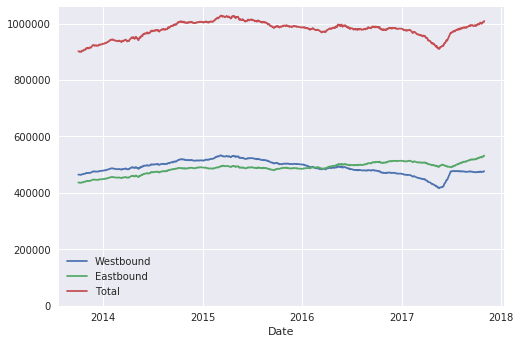

In [5]:
ax = data.resample( 'D' ).sum().rolling(365).sum().plot();
ax.set_ylim( 0, None );

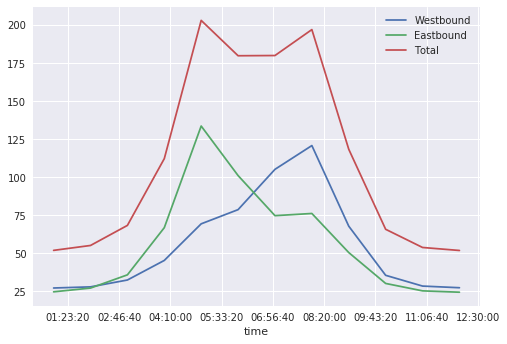

In [6]:
data.groupby( data.index.time ).mean().plot()

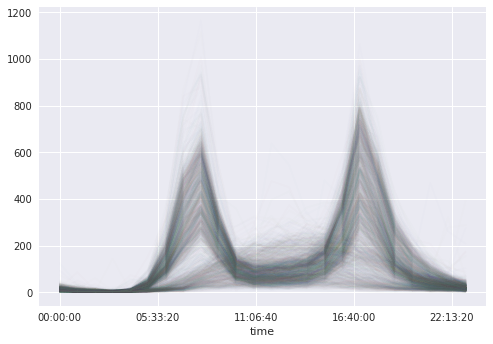

In [11]:
pivoted = data.pivot_table( 'Total', index=data.index.time, columns=data.index.date )
pivoted.iloc[:5, :5]
pivoted.plot( legend=False, alpha=0.01 )

In [16]:
pivoted.T.shape

(1855, 24)



## Principal Component Analysis
how do each of the days in our data set relate to each other, as determined by the data?  Let's try a PCA.

In [17]:
from sklearn.decomposition import PCA

In [18]:
PCA(2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
X = pivoted.fillna(0).T.values

In [28]:
X2 = PCA( 2, svd_solver='full' ).fit_transform( X )

(1855, 2)


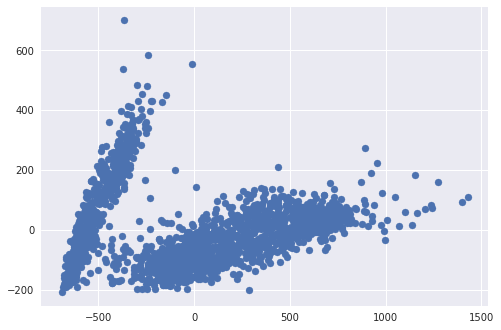

In [33]:
print( X2.shape )
plt.scatter( X2[:, 0], X2[:, 1] )

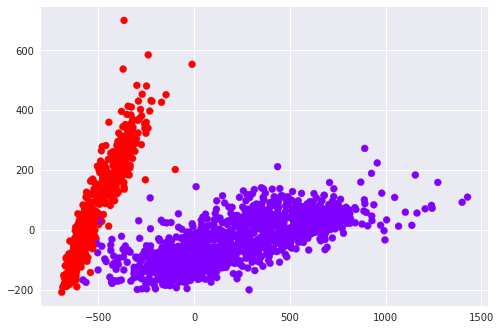

In [37]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture( 2 )
gmm.fit( X )
labels = gmm.predict( X )

plt.scatter( X2[:, 0], X2[:, 1], c=labels, cmap='rainbow' )